In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore FutureWarnings related to is_categorical_dtype
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
path = '../Data/Net Asset Value.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Umoja Fund,"302,291,686,824.91","344,671,758.31",877.0422,877.0422,868.2718,30-12-2022
1,Wekeza Maisha Fund,"6,658,727,935.83","8,978,247.54",741.6512,741.6512,726.8182,30-12-2022
2,Watoto Fund,"8,426,930,098.23","15,378,315.70",547.9748,547.9748,542.4951,30-12-2022
3,Jikimu Fund,"19,122,648,898.31","120,180,812.85",159.1157,159.1157,155.9333,30-12-2022
4,Liquid Fund,"559,272,074,566.94","1,632,828,600.86",342.5173,342.5173,342.5173,30-12-2022


In [4]:
data.columns

Index(['Scheme Name', 'Net Asset Value', 'Outstanding Number of Units',
       'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit',
       'Date Valued'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Scheme Name                  9088 non-null   object 
 1   Net Asset Value              9088 non-null   object 
 2   Outstanding Number of Units  9088 non-null   object 
 3   Nav Per Unit                 9088 non-null   float64
 4   Sale Price per Unit          9088 non-null   float64
 5   Repurchase Price/Unit        9088 non-null   float64
 6   Date Valued                  9088 non-null   object 
dtypes: float64(3), object(4)
memory usage: 497.1+ KB


In [6]:
import re
def clean_and_extract_number(s):
    cleaned_value = re.sub(r'[^\d.]', '', str(s))
    return cleaned_value
numeric_columns = ['Net Asset Value','Outstanding Number of Units']
for col in numeric_columns:
    data[col] = data[col].apply(clean_and_extract_number)
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Scheme Name                  9088 non-null   object 
 1   Net Asset Value              9088 non-null   float64
 2   Outstanding Number of Units  9088 non-null   float64
 3   Nav Per Unit                 9088 non-null   float64
 4   Sale Price per Unit          9088 non-null   float64
 5   Repurchase Price/Unit        9088 non-null   float64
 6   Date Valued                  9088 non-null   object 
dtypes: float64(5), object(2)
memory usage: 497.1+ KB


In [7]:
data['Date Valued'] = data['Date Valued'].astype(str)
data['Date Valued'] = data['Date Valued'].str.replace('/', '-')  
data['Date Valued'] = pd.to_datetime(data['Date Valued'], format='%d-%m-%Y', errors='coerce')
data['Date Valued'] = pd.to_datetime(data['Date Valued'])
data.dtypes

Scheme Name                            object
Net Asset Value                       float64
Outstanding Number of Units           float64
Nav Per Unit                          float64
Sale Price per Unit                   float64
Repurchase Price/Unit                 float64
Date Valued                    datetime64[ns]
dtype: object

Insights:

Distribution of Schemes: You can observe the distribution of different schemes in your net asset value dataset. This will show you how many data points are associated with each scheme.

Popular Schemes: You can identify which schemes are the most common or popular in your dataset based on the height of the bars. Schemes with taller bars have more data points associated with them.

Scheme Diversity: You can see if there are a few schemes dominating the dataset or if it's more evenly distributed among various schemes. This can be useful for understanding the diversity of your investments.

Potential Outliers: You may notice any outlier schemes that have significantly fewer or more data points than others. These outliers could be worth investigating further.

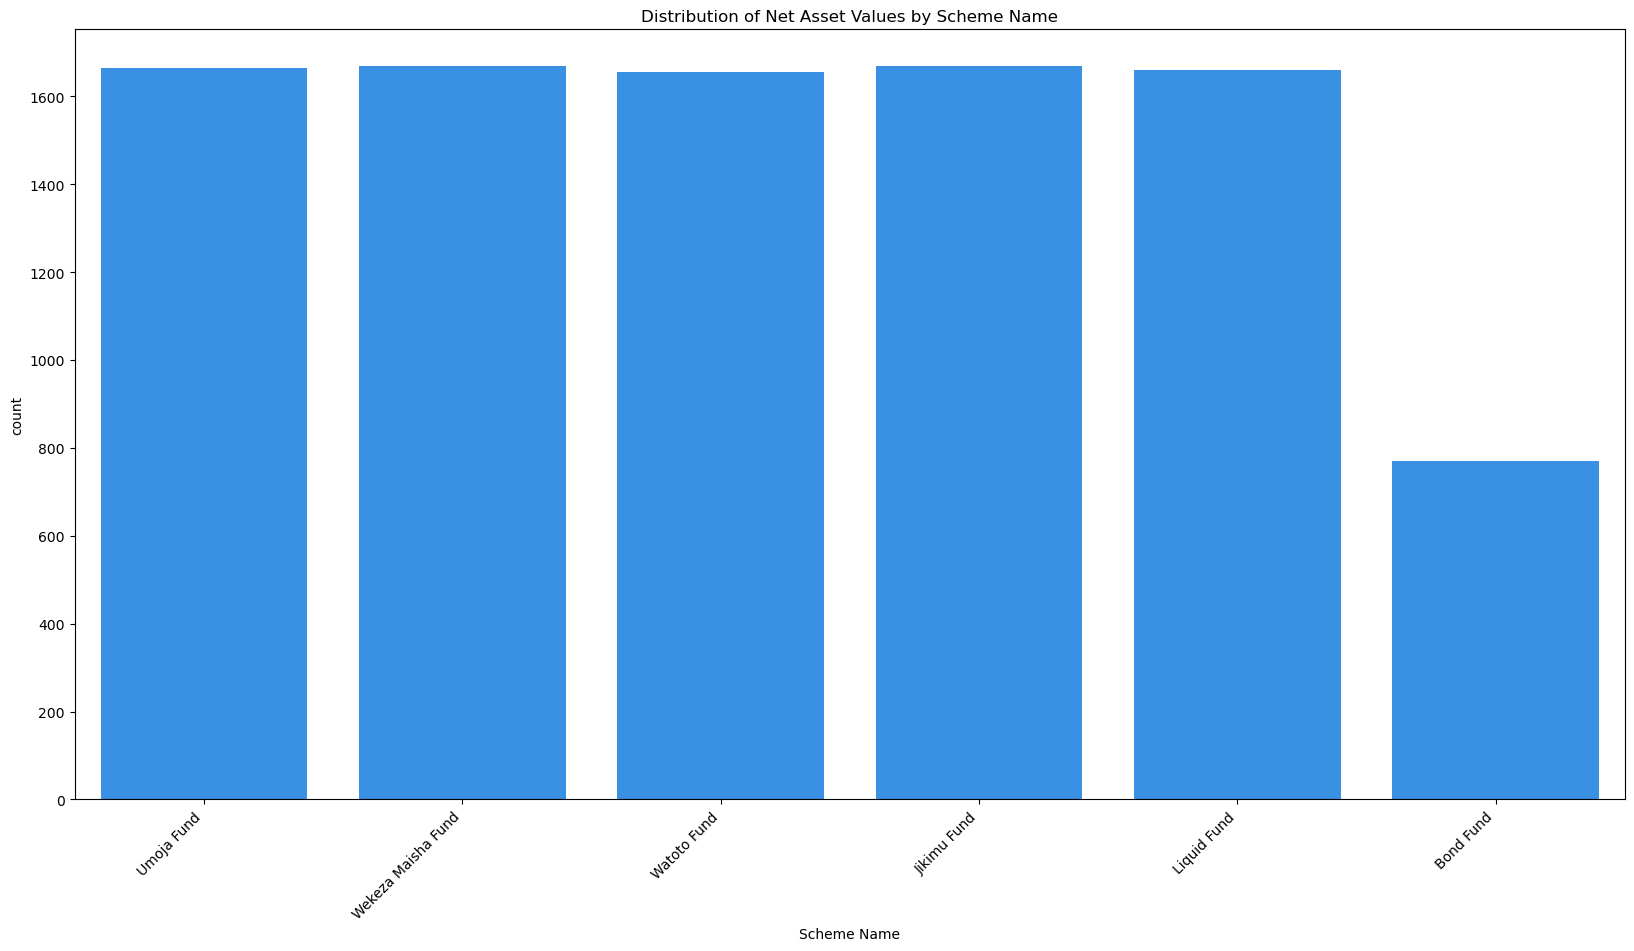

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(data, x=data['Scheme Name'], color='dodgerblue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Net Asset Values by Scheme Name')
plt.show()

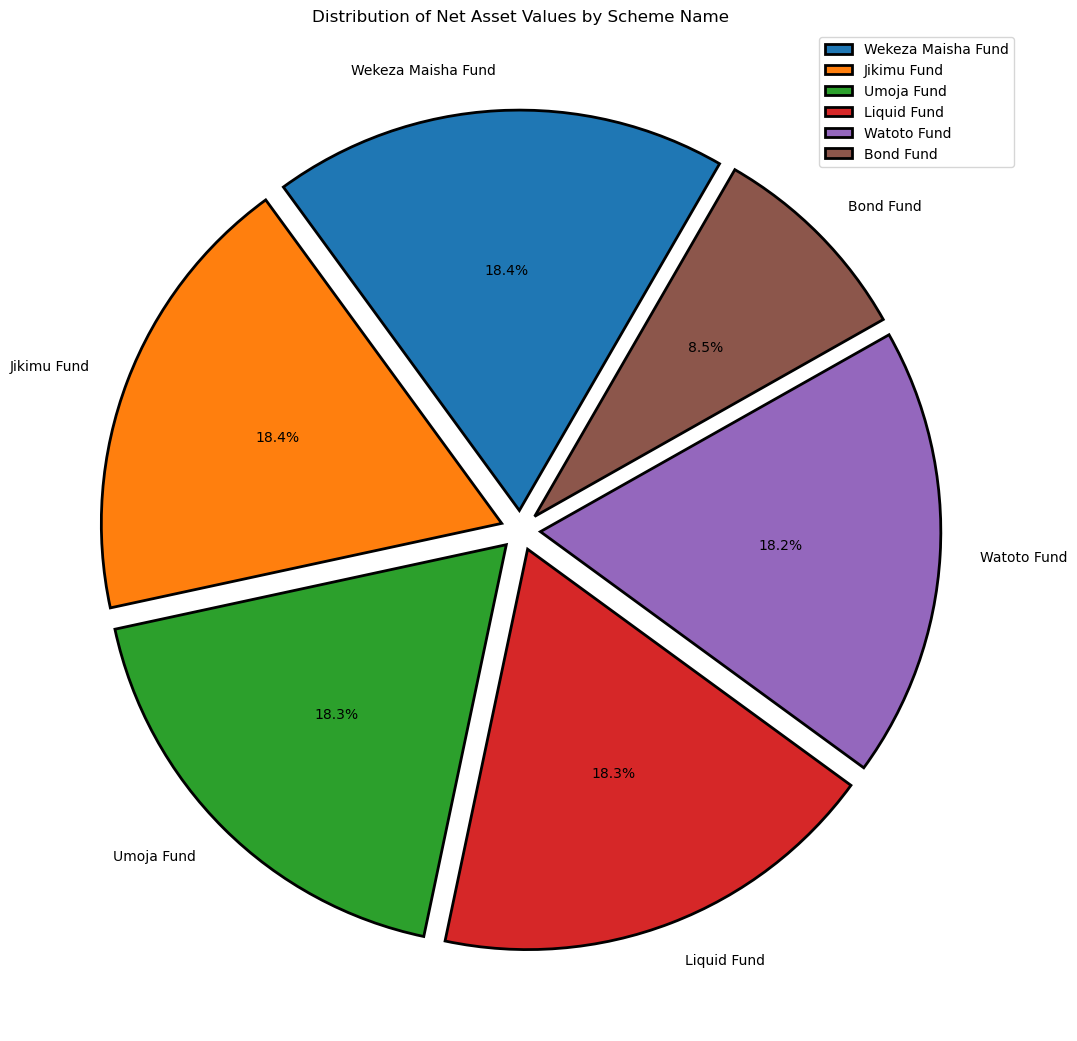

In [9]:
funds_counts = data['Scheme Name'].value_counts()
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)  # Adjusted explode tuple for six Scheme Names

plt.figure(figsize=(13, 13))
plt.pie(funds_counts, explode=explode, labels=funds_counts.index, autopct='%1.1f%%', startangle=60, wedgeprops={"edgecolor": "black", 'linewidth': 2, 'antialiased': True})
plt.legend()
plt.title('Distribution of Net Asset Values by Scheme Name')
plt.show()

A stacked bar chart showing the total net asset value (NAV) by scheme name can provide several insights into your data:

Comparison of NAV: You can easily compare the total NAV across different schemes. This can help you identify which schemes have the highest or lowest total NAV, providing insights into the relative size or popularity of each scheme.

Relative Contribution: You can see the relative contribution of each scheme to the total NAV. This can be helpful for understanding which schemes have a more significant impact on the overall portfolio.

Portfolio Diversification: If you are managing an investment portfolio, the chart can show how diversified the portfolio is across different schemes. A more evenly distributed chart may indicate better diversification.

Identifying Leaders and Laggards: It can help you identify the top-performing schemes (those with the highest NAV) and those that might need attention or further analysis.

Trends Over Time: If you have data for multiple time periods, you can create stacked bar charts for each period and compare them to identify trends in scheme performance and asset allocation changes.

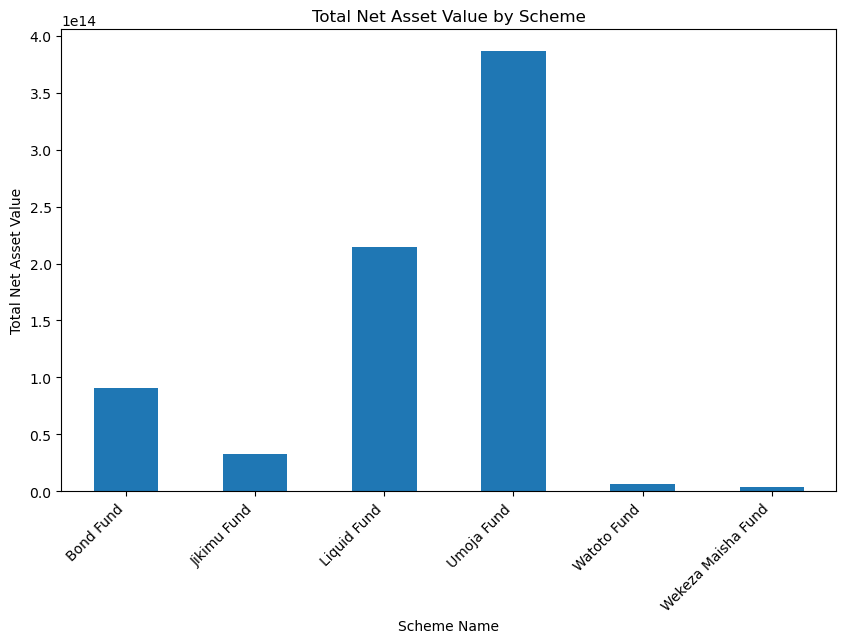

In [10]:
# grouping dat aby svcheme name and net asset value
grouping = data.groupby('Scheme Name')['Net Asset Value'].sum()

# Adjust the figsize as needed
plt.figure(figsize=(10, 6))

# Plot the stacked bar chart
ax = grouping.plot(kind='bar', stacked=True)

plt.xlabel('Scheme Name')
plt.ylabel('Total Net Asset Value')
plt.title('Total Net Asset Value by Scheme')
plt.xticks(rotation=45, ha='right')
plt.show()


Yearly Plot (Average Net Asset Value of Schemes Over the Years):

Yearly Trends: You can observe how the average net asset value (NAV) of schemes has evolved over the years. Are there any noticeable trends such as consistent growth, fluctuations, or periods of decline?

Yearly Performance Comparison: You can compare the performance of different schemes within each year. Which schemes tend to have higher average NAV each year, and which ones perform less consistently?

Identifying Outliers: Look for any years where there are significant deviations from the overall trend. This could indicate exceptional performance or challenging economic conditions during those years.

Long-term Growth: You can assess the long-term growth of the net asset values for various schemes. This might help identify schemes that consistently outperform others over extended periods.

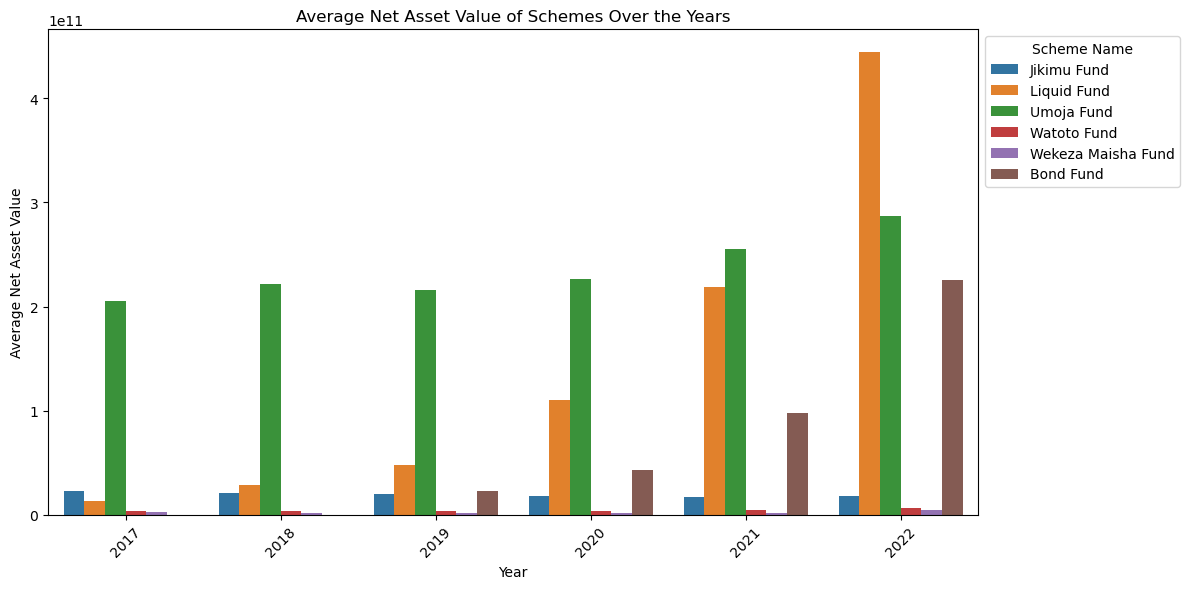

In [11]:
# Convert 'Date Valued' column to datetime and extract the year
data['Year'] = pd.to_datetime(data['Date Valued']).dt.year

scheme_avg_nav = data.groupby(['Year', 'Scheme Name'])['Net Asset Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=scheme_avg_nav, x='Year', y='Net Asset Value', hue='Scheme Name')
plt.xlabel('Year')
plt.ylabel('Average Net Asset Value')
plt.title('Average Net Asset Value of Schemes Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Scheme Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

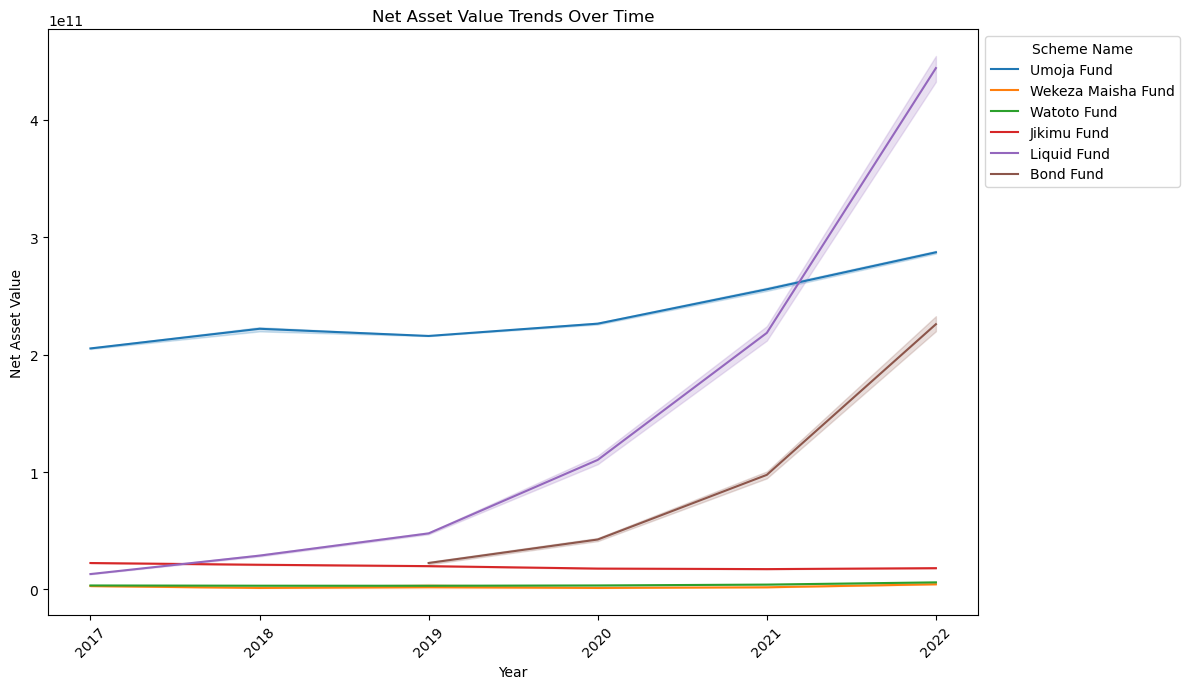

In [12]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=data, x='Year', y='Net Asset Value', hue='Scheme Name')
plt.xlabel('Year')
plt.ylabel('Net Asset Value')
plt.title('Net Asset Value Trends Over Time')
plt.xticks(rotation=45)
plt.legend(title='Scheme Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Monthly Plot (Average Net Asset Value of Schemes by Month):

Seasonal Patterns: Analyzing monthly data allows you to detect seasonal patterns. Are there certain months or seasons where the average NAV tends to be higher or lower? This could be due to market or economic factors.

Monthly Fluctuations: Examine monthly fluctuations to identify any schemes that are more sensitive to short-term market changes. Some schemes may exhibit higher volatility or sensitivity to specific months.

Month-to-Month Variability: Look for patterns of consistency or variability in scheme performance. Are there months where most schemes perform similarly, and other months where there is significant divergence in performance?

Investor Behavior: Consider how investor behavior or market events might influence monthly trends. For example, tax seasons, holidays, or significant economic events could impact NAV on a monthly basis.

Liquidity Analysis: Analyze whether schemes experience changes in net asset value due to redemption or purchase behaviors by investors during specific months.

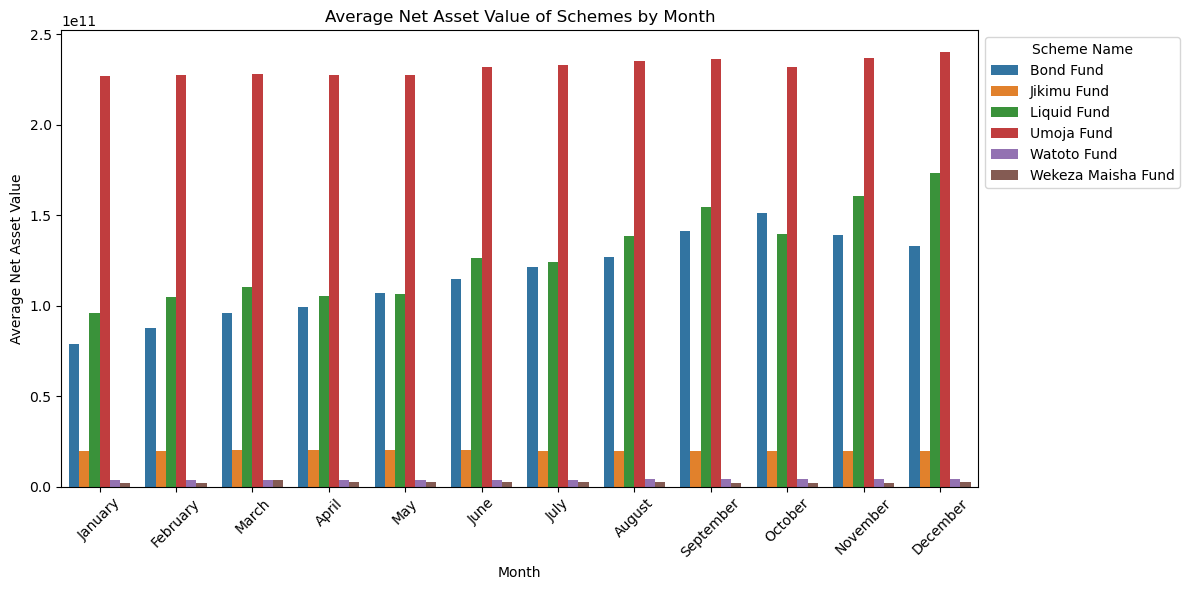

In [13]:
# Convert 'Date Valued' column to datetime and extract the month
data['Month'] = pd.to_datetime(data['Date Valued']).dt.month

scheme_avg_nav = data.groupby(['Month', 'Scheme Name'])['Net Asset Value'].mean().reset_index()

# Define a list of month names for labeling
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.barplot(data=scheme_avg_nav, x='Month', y='Net Asset Value', hue='Scheme Name')
plt.xlabel('Month')
plt.ylabel('Average Net Asset Value')
plt.title('Average Net Asset Value of Schemes by Month')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.legend(title='Scheme Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

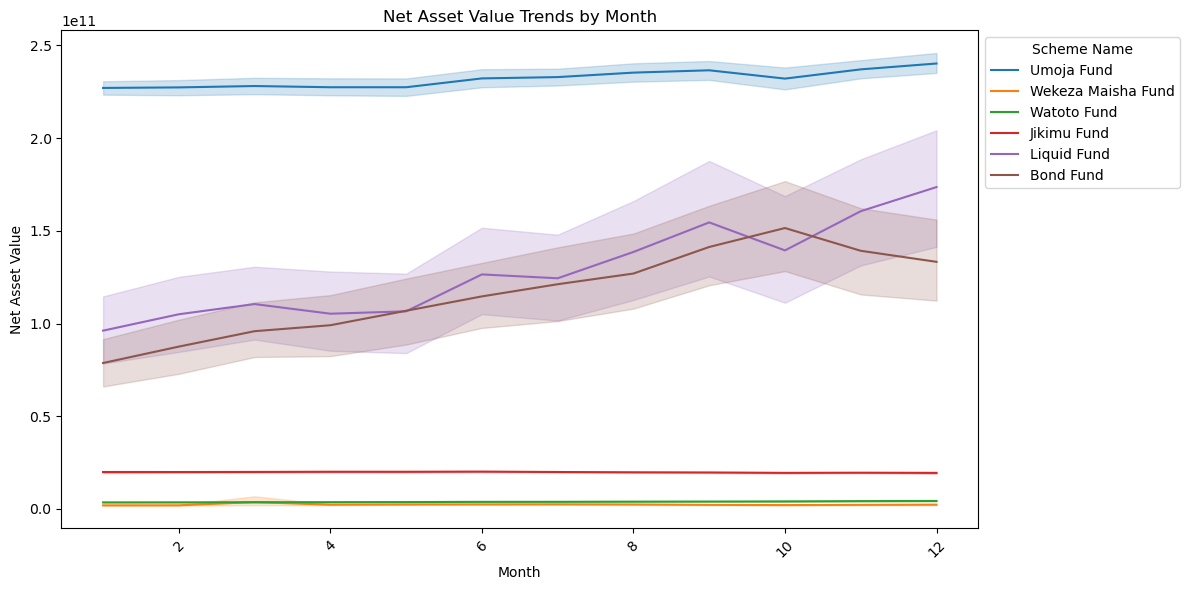

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Month', y='Net Asset Value', hue='Scheme Name')
plt.xlabel('Month')
plt.ylabel('Net Asset Value')
plt.title('Net Asset Value Trends by Month')
plt.xticks(rotation=45)
plt.legend(title='Scheme Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

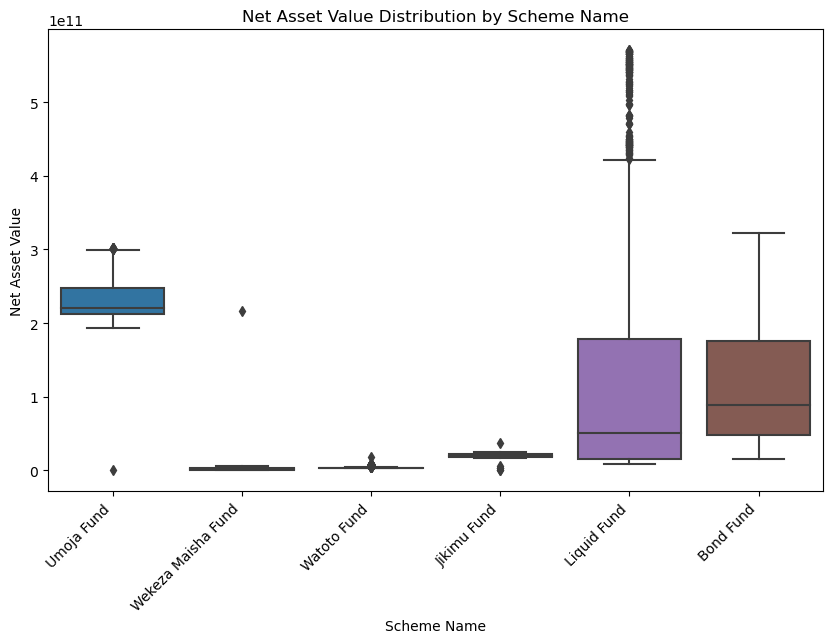

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Scheme Name", y="Net Asset Value")
plt.title("Net Asset Value Distribution by Scheme Name")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Scheme Name")
plt.ylabel("Net Asset Value")
plt.show()

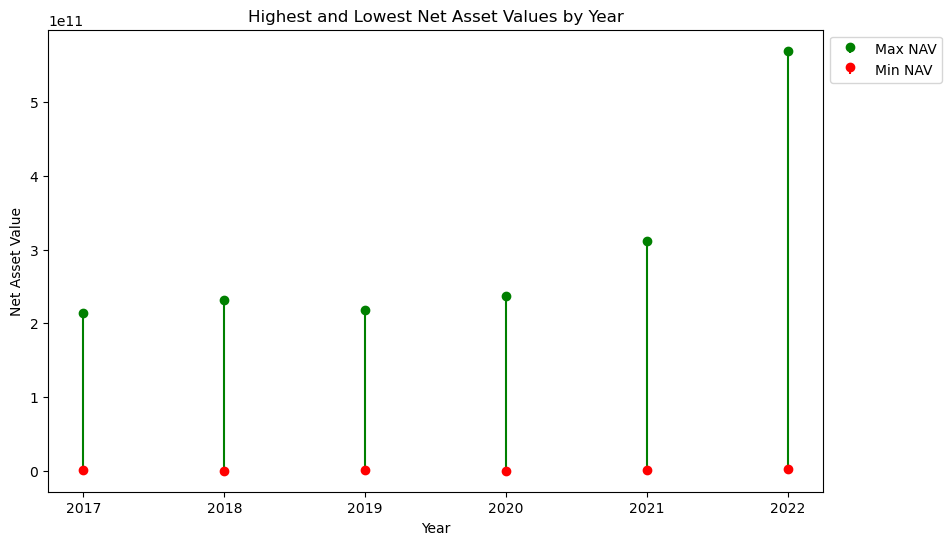

In [16]:
plt.figure(figsize=(10, 6))

max_nav = data.groupby("Year")["Net Asset Value"].max()
min_nav = data.groupby("Year")["Net Asset Value"].min()

plt.stem(max_nav.index, max_nav, basefmt=" ", linefmt="-g", markerfmt="go", label="Max NAV")
plt.stem(min_nav.index, min_nav, basefmt=" ", linefmt="-r", markerfmt="ro", label="Min NAV")
plt.title("Highest and Lowest Net Asset Values by Year")
plt.xlabel("Year")
plt.ylabel("Net Asset Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

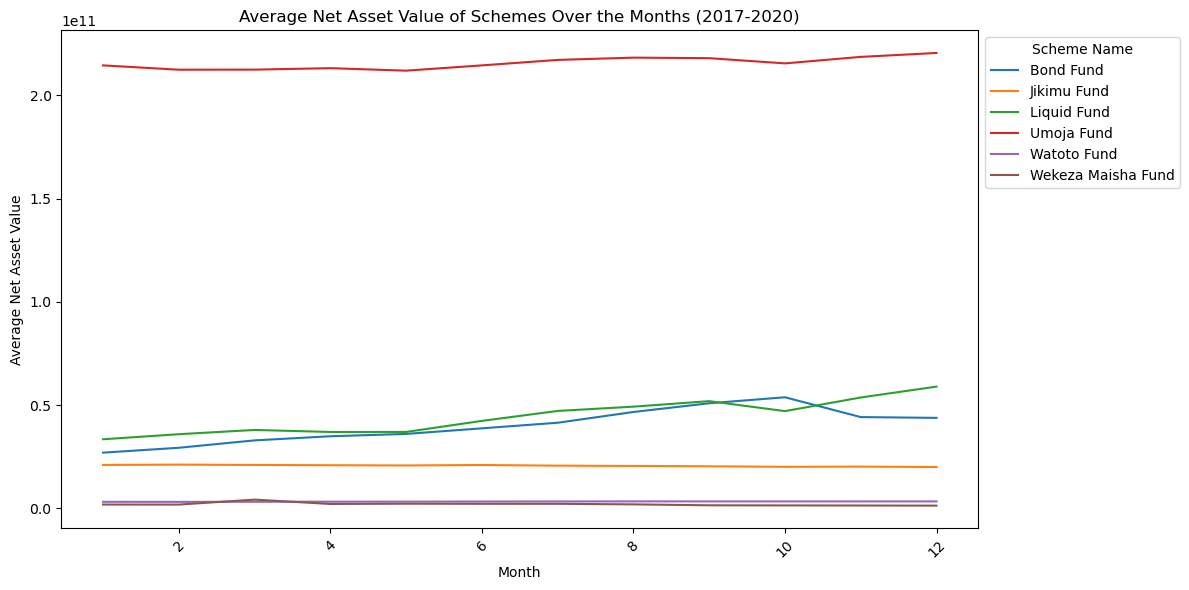

In [17]:
filtered_data = data[(data['Year'] >= 2017) & (data['Year'] <= 2020)]

month_nav_avg = filtered_data.groupby(['Month', 'Scheme Name'])['Net Asset Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=month_nav_avg, x='Month', y='Net Asset Value', hue='Scheme Name')
plt.xlabel('Month')
plt.ylabel('Average Net Asset Value')
plt.title('Average Net Asset Value of Schemes Over the Months (2017-2020)')
plt.xticks(rotation=45)
plt.legend(title='Scheme Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

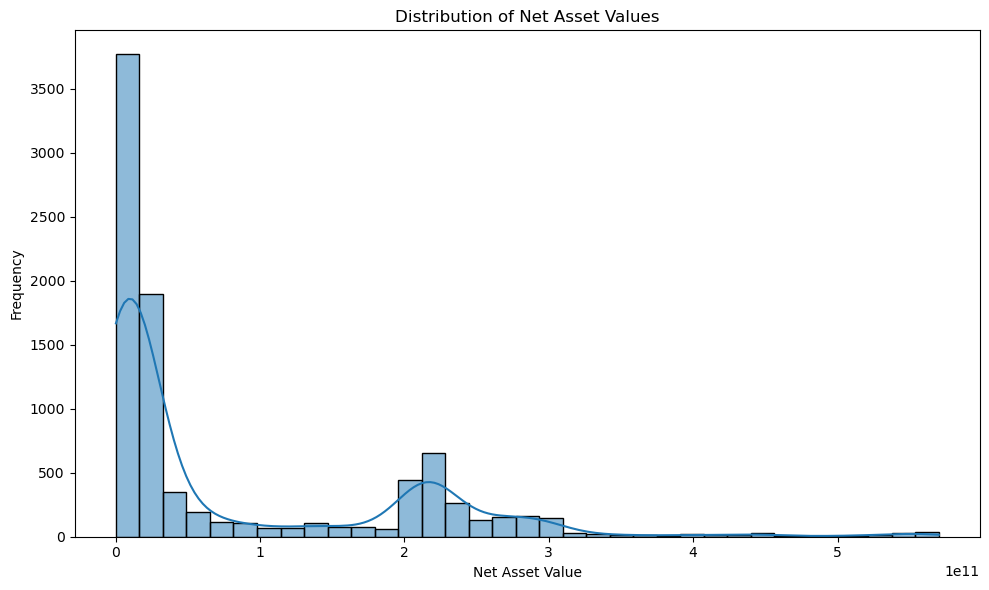

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Net Asset Value'], kde=True)
plt.title('Distribution of Net Asset Values')
plt.xlabel('Net Asset Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [19]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued,Year,Month
0,Umoja Fund,3.022917e+11,3.446718e+08,877.0422,877.0422,868.2718,2022-12-30,2022,12
1,Wekeza Maisha Fund,6.658728e+09,8.978248e+06,741.6512,741.6512,726.8182,2022-12-30,2022,12
2,Watoto Fund,8.426930e+09,1.537832e+07,547.9748,547.9748,542.4951,2022-12-30,2022,12
3,Jikimu Fund,1.912265e+10,1.201808e+08,159.1157,159.1157,155.9333,2022-12-30,2022,12
4,Liquid Fund,5.592721e+11,1.632829e+09,342.5173,342.5173,342.5173,2022-12-30,2022,12


### Hypotheses:

***Hypothesis 1:*** The NAV of different funds has shown a general upward trend over time, indicating overall growth.

***Hypothesis 2:*** There may be seasonality or cyclical patterns in the NAV data, which can be identified through time series analysis.

***Hypothesis 3:*** Certain funds have higher volatility (fluctuations) in their NAV compared to others, indicating different risk levels.


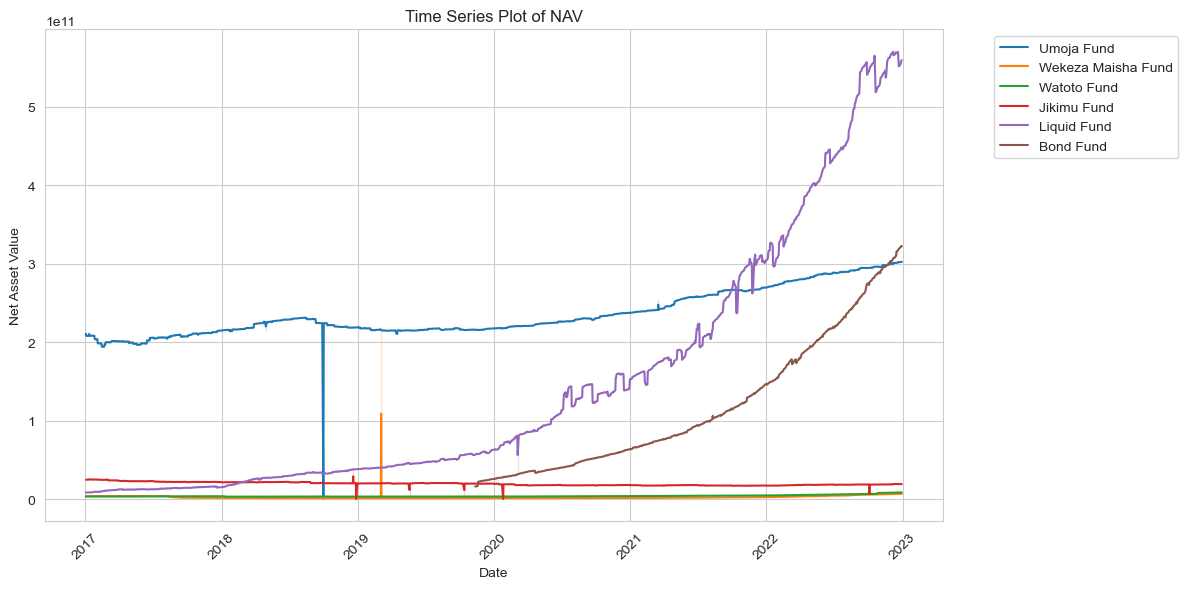

In [20]:
# Set a consistent style for Seaborn plots
sns.set_style("whitegrid")

# Hypothesis 1: Time Series Plot of NAV
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date Valued', y='Net Asset Value', hue='Scheme Name')
plt.title("Time Series Plot of NAV")
plt.xlabel("Date")
plt.ylabel("Net Asset Value")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

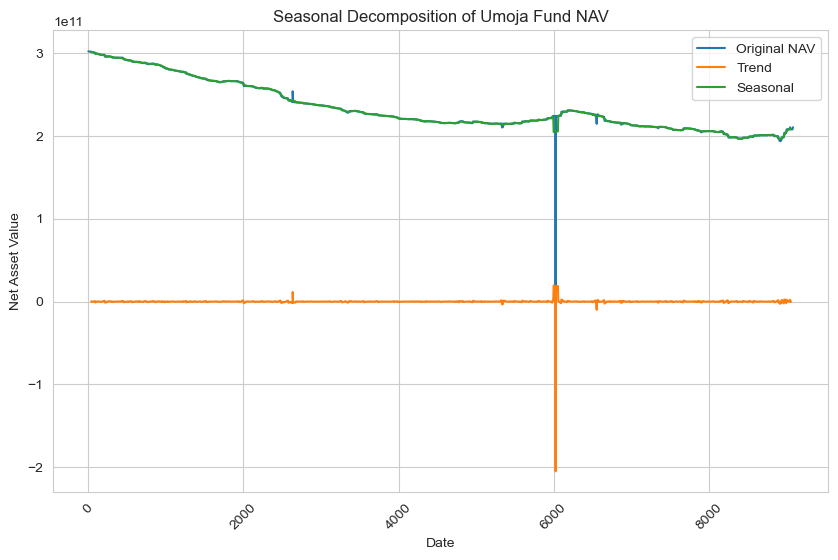

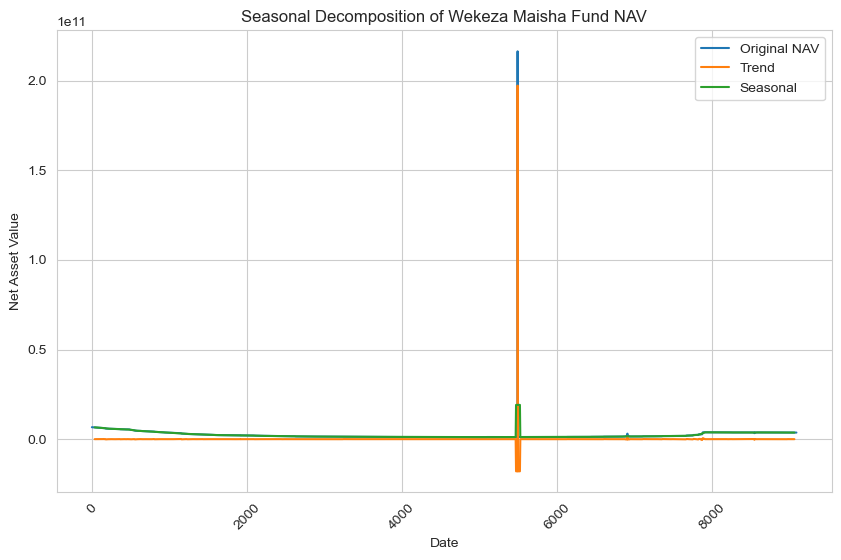

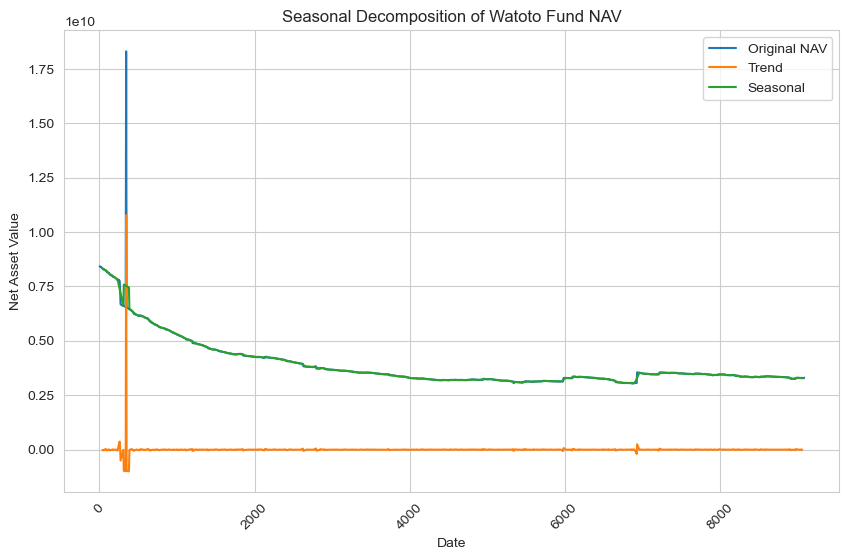

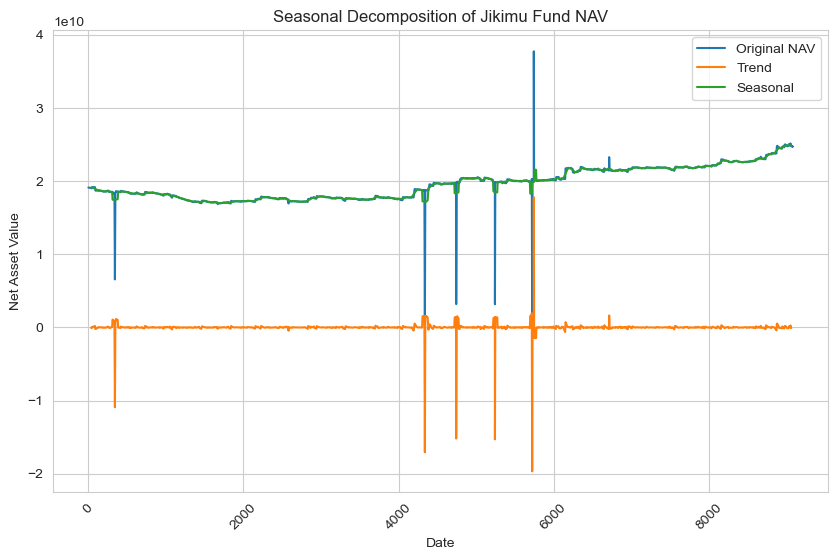

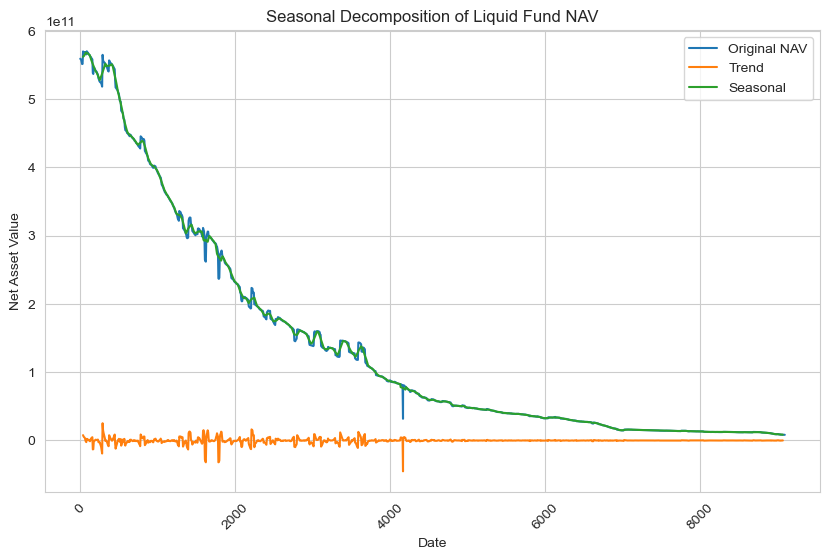

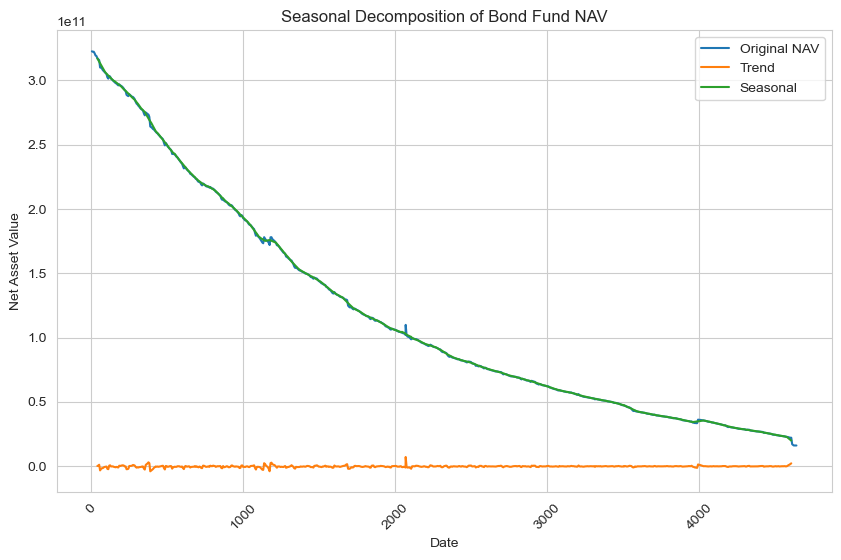

In [21]:
# List of unique fund names in your dataset
fund_names = data['Scheme Name'].unique()

# Loop through each fund for seasonal decomposition
for fund_name in fund_names:
    fund_data = data[data['Scheme Name'] == fund_name]
    nav_series = fund_data['Net Asset Value']
    
    # Manually specify the seasonal period based on your data
    seasonal_period = 12  # Example: assuming monthly data (adjust as needed)
    
    # Calculate the rolling mean for the seasonal component
    seasonal_component = nav_series.rolling(window=seasonal_period, center=True).mean()
    
    # Calculate the trend (detrended) component
    trend_component = nav_series - seasonal_component
    
    # Plot the seasonal decomposition for each fund
    plt.figure(figsize=(10, 6))
    plt.plot(nav_series.index, nav_series.values, label='Original NAV')
    plt.plot(nav_series.index, trend_component, label='Trend')
    plt.plot(nav_series.index, seasonal_component, label='Seasonal')
    plt.title(f"Seasonal Decomposition of {fund_name} NAV")
    plt.xlabel("Date")
    plt.ylabel("Net Asset Value")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

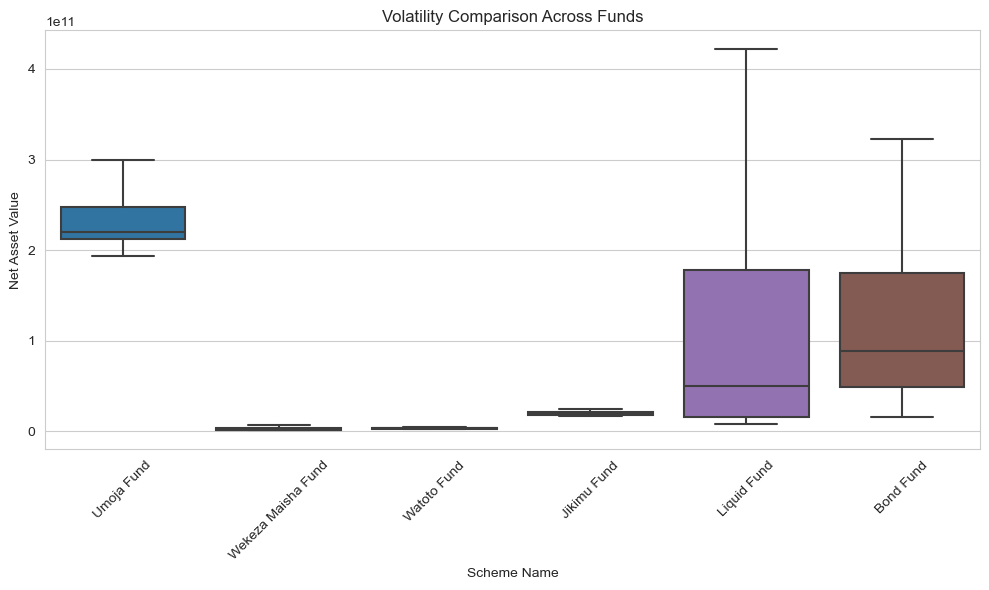

In [22]:
# Hypothesis 3: Volatility Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Scheme Name', y='Net Asset Value', showfliers=False)
plt.title("Volatility Comparison Across Funds")
plt.xlabel("Scheme Name")
plt.ylabel("Net Asset Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

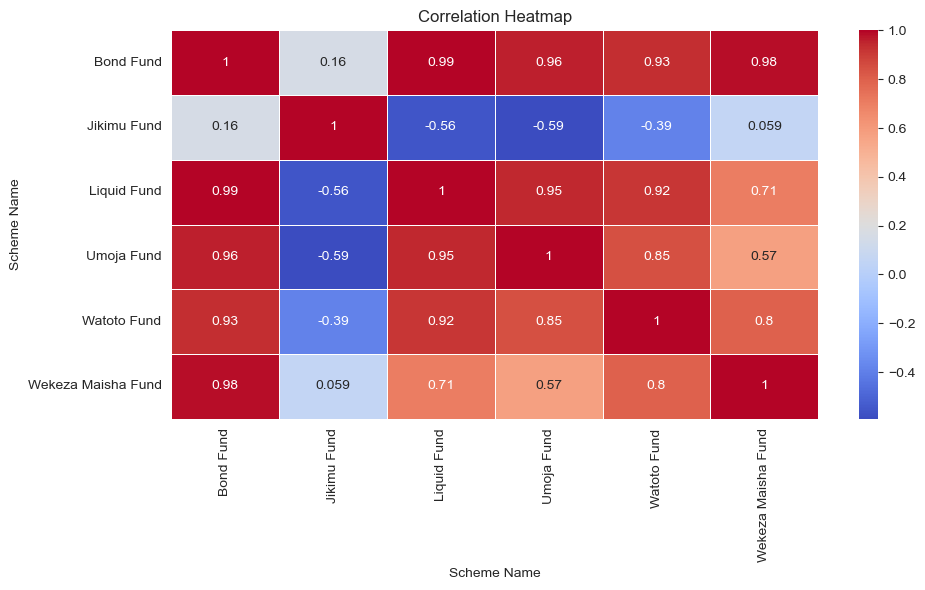

In [23]:
# Visualization 4: Correlation Heatmap
corr_matrix = data.pivot_table(index='Date Valued', columns='Scheme Name', values='Net Asset Value', aggfunc='first').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [24]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued,Year,Month
0,Umoja Fund,3.022917e+11,3.446718e+08,877.0422,877.0422,868.2718,2022-12-30,2022,12
1,Wekeza Maisha Fund,6.658728e+09,8.978248e+06,741.6512,741.6512,726.8182,2022-12-30,2022,12
2,Watoto Fund,8.426930e+09,1.537832e+07,547.9748,547.9748,542.4951,2022-12-30,2022,12
3,Jikimu Fund,1.912265e+10,1.201808e+08,159.1157,159.1157,155.9333,2022-12-30,2022,12
4,Liquid Fund,5.592721e+11,1.632829e+09,342.5173,342.5173,342.5173,2022-12-30,2022,12


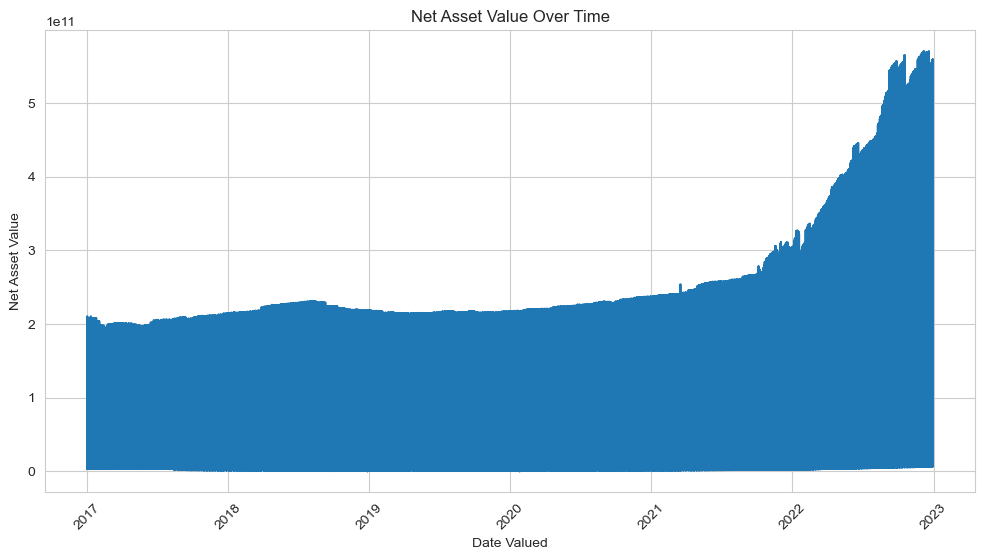

In [25]:
# Time series plot of NAV
plt.figure(figsize=(12, 6))
plt.plot(data['Date Valued'], data['Net Asset Value'])
plt.xlabel('Date Valued')
plt.ylabel('Net Asset Value')
plt.title('Net Asset Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

***Original:*** show the actual net asset value over time
    
***Trend:*** identify the underlying trend in the NAV values, whether they are increasing, decreasing, or relatively stable.

***Seasonal:*** shows the periodic or seasonal patterns in the data.    
    
***Residual:*** graph displays the noise or error left in the data after removing the trend and seasonality.

Index(['Scheme Name', 'Net Asset Value', 'Outstanding Number of Units',
       'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit',
       'Date Valued', 'Year', 'Month'],
      dtype='object')


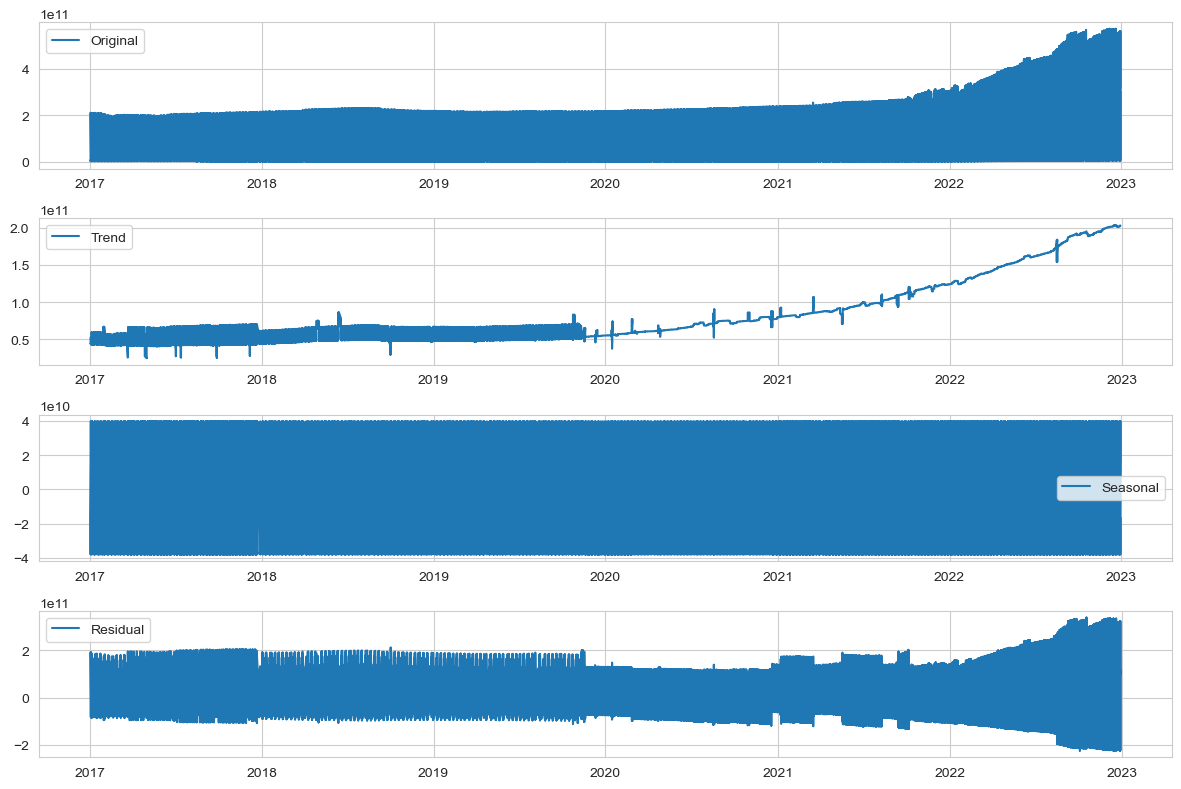

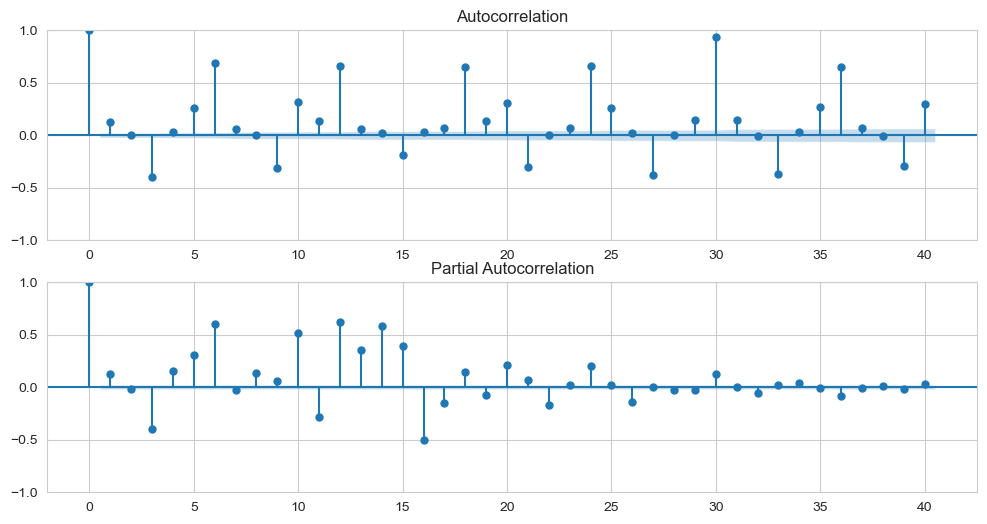

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Check the column names in your dataset
print(data.columns)

# Replace 'Date Valued' with the correct column name
date_column = 'Date Valued'  # Replace with the actual column name if different

# Set the specified column as the index for time series analysis
if date_column in data.columns:
    data.set_index(date_column, inplace=True)
else:
    print(f"Column '{date_column}' not found in the dataset.")

# Decomposition to identify trend and seasonality
decomposition = sm.tsa.seasonal_decompose(data['Net Asset Value'], model='additive', period=12)  # Change the period based on your data's seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Net Asset Value'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Autocorrelation analysis (ACF and PACF plots)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
sm.graphics.tsa.plot_acf(data['Net Asset Value'], lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(data['Net Asset Value'], lags=40, ax=ax2)
plt.show()

In [29]:
data.columns

Index(['Scheme Name', 'Net Asset Value', 'Outstanding Number of Units',
       'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit', 'Year',
       'Month'],
      dtype='object')